In [1]:
import csv
import os
from collections import defaultdict
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import KeyedVectors # load the Stanford GloVe model
import ftfy
import string
from nltk.tokenize import word_tokenize
import pickle

C:\Users\Naini\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [12]:
df2 = pd.read_pickle('tokenized_data.pickle')

In [13]:
heads = df2['heads']
heads

0         House Republicans Fret About Winning Their Hea...
1         Rift Between Officers and Residents as Killing...
2         Tyrus Wong Bambi Artist Thwarted by Racial Bia...
3         Among Deaths in 2016 a Heavy Toll in Pop Music...
4         Kim Jongun Says North Korea Is Preparing to Te...
5         Sick With a Cold Queen Elizabeth Misses New Ye...
6         Taiwans President Accuses China of Renewed Int...
7         After The Biggest Loser Their Bodies Fought to...
8         First a Mixtape Then a Romance The New York Times
9         Calling on Angels While Enduring the Trials of...
10        Weak Federal Powers Could Limit Trumps Climate...
11        Can Carbon Capture Technology Prosper Under Tr...
12        MaraLago the Future Winter White House and Hom...
13        How to form healthy habits in your 20s The New...
14        Turning Your Vacation Photos Into Works of Art...
15        As Second Avenue Subway Opens a Train Delay En...
16        Dylann Roof Himself Rejects Be

In [14]:
descs = df2['descs']
descs

0         WASHINGTON — Congressional Republicans have a ...
1         After the bullet shells get counted the blood ...
2         When Walt Disneys Bambi opened in 1942 critics...
3         Death may be the great equalizer but it isnt n...
4         SEOUL South Korea — North Koreas leader Kim sa...
5         LONDON — Queen Elizabeth II who has been battl...
6         BEIJING — President Tsai of Taiwan sharply cri...
7         Danny Cahill stood slightly dazed in a blizzar...
8         Just how is Hillary Kerr the founder of a digi...
9         Angels are everywhere in the Muñiz familys apa...
10        With Donald J Trump about to take control of t...
11        THOMPSONS Tex — Can one of the most promising ...
12        WEST PALM BEACH Fla — When Donald J Trump rang...
13        This article is part of a series aimed at help...
14        Its the season for family travel and photos — ...
15        Finally The Second Avenue subway opened in New...
16        pages into the journal found i

In [15]:
i=0
heads[i]

'House Republicans Fret About Winning Their Health Care Suit The New York Times'

In [17]:
descs[i]


'WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration They might win The incoming Trump administration could choose to no longer defend the executive branch against the suit which challenges the administrations authority to spend billions of dollars on health insurance subsidies for and Americans handing House Republicans a big victory on issues But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode leaving millions of people without access to health insurance before Republicans have prepared a replacement That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government To stave off that outcome Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law angering conservative voters who have been demanding an end to the 

In [18]:
len(heads),len(set(heads))

(142568, 142084)

In [21]:
len(descs),len(set(descs))


(142568, 141972)

In [22]:
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return vocab, vocabcount

In [23]:
vocab, vocabcount = get_vocab(heads+descs)

### Most popular tokens 

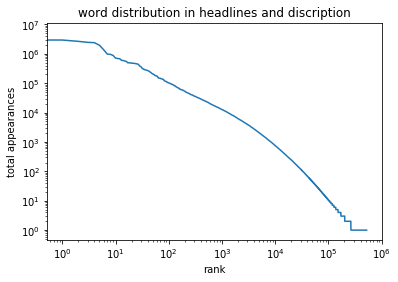

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');